In [1]:
import pandas as pd
import numpy as np

In [2]:
original_data=pd.read_csv(r"C:\Users\Jarvis\Desktop\FD.csv",names=
                          ["Age","Workclass","flnwgt","Education","Education_num","Martial status","Occupation","Relationship",
                           "Race","Gender","capital Gain","Capital Loss","Hours per week","Country","Target"],
                          sep=r'\s*,\s*',engine='python',na_values="?")
original_data.head()

,Age,Workclass,flnwgt,Education,Education_num,Martial status,Occupation,Relationship,Race,Gender,capital Gain,Capital Loss,Hours per week,Country,Target
0,"""39",State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,"<=50K"""
1,"""50",Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,"<=50K"""
2,"""38",Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,"<=50K"""
3,"""53",Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,"<=50K"""
4,"""28",Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,"<=50K"""


5


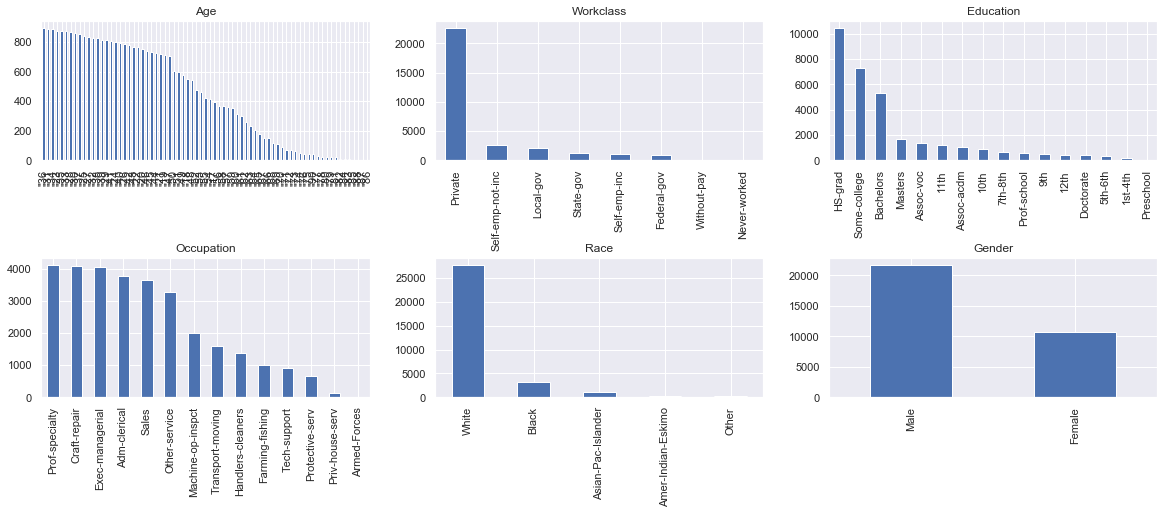

In [3]:
import matplotlib.pyplot as plt
import math
import seaborn as sns;sns.set()

fig=plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(original_data.shape[1]/cols)
print(rows)
l1=["Age","Workclass","Education","Occupation","Race","Gender"]

for i ,column in enumerate(l1):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if original_data.dtypes[column]==np.object:
        original_data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        orginal_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.7,wspace=0.2)
plt.show()
        
        
        

In [4]:
# use labelencoder to transform text to number
import sklearn.preprocessing as prep
le=prep.LabelEncoder()
original_data["Occupation"]=le.fit_transform(original_data["Occupation"].astype(str))
original_data.head()

,Age,Workclass,flnwgt,Education,Education_num,Martial status,Occupation,Relationship,Race,Gender,capital Gain,Capital Loss,Hours per week,Country,Target
0,"""39",State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,"<=50K"""
1,"""50",Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,"<=50K"""
2,"""38",Private,215646,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,"<=50K"""
3,"""53",Private,234721,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,"<=50K"""
4,"""28",Private,338409,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,"<=50K"""


In [5]:
original_data["Target"]=le.fit_transform(original_data["Target"].astype(str))
original_data["Race"]=le.fit_transform(original_data["Race"].astype(str))
original_data["Gender"]=le.fit_transform(original_data["Gender"].astype(str))
original_data["Martial status"]=le.fit_transform(original_data["Martial status"].astype(str))
original_data["Education"]=le.fit_transform(original_data["Education"].astype(str))
original_data["Age"]=le.fit_transform(original_data["Age"].astype(str))


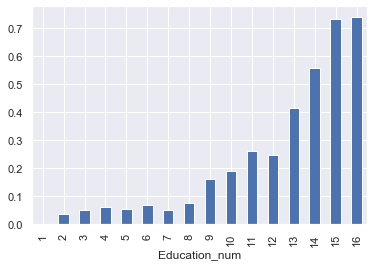

In [6]:
original_data.groupby('Education_num').Target.mean().plot(kind='bar')

In [7]:
from sklearn.model_selection import train_test_split
x=original_data[['Education_num','Occupation']]
y=original_data['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7861200675571933


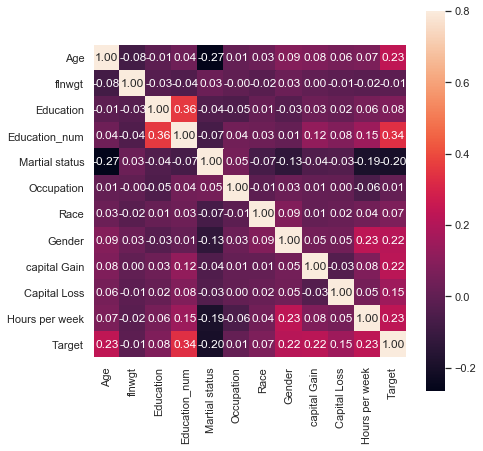

In [9]:
import seaborn as sns
#for correaltion matrix

corrmat=original_data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
plt.show()

In [10]:
x=original_data[['Education_num','Occupation','Age','Gender']]
y=original_data['Target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
classifier=SVC()
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7925687087363734
